In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43
image_size = (30, 30)  # Change to your desired image size

# Retrieving the images and their labels
for i in range(classes):
    path = os.path.join('train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(os.path.join(path, a))
            image = image.resize(image_size)
            image = np.array(image)
            data.append(image)
            labels.append(i)
        
        except:
            print("Error loading image:", os.path.join(path, a))


#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)


(39209, 30, 30, 3) (39209,)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [25]:

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")


Epoch 1/15
981/981 [==============================] - 20s 20ms/step - loss: 1.8754 - accuracy: 0.5078 - val_loss: 0.5553 - val_accuracy: 0.8521
Epoch 2/15
981/981 [==============================] - 22s 23ms/step - loss: 0.6564 - accuracy: 0.8074 - val_loss: 0.2014 - val_accuracy: 0.9482
Epoch 3/15
981/981 [==============================] - 20s 20ms/step - loss: 0.3698 - accuracy: 0.8928 - val_loss: 0.1151 - val_accuracy: 0.9705
Epoch 4/15
981/981 [==============================] - 21s 21ms/step - loss: 0.3040 - accuracy: 0.9133 - val_loss: 0.0757 - val_accuracy: 0.9819
Epoch 5/15
981/981 [==============================] - 20s 21ms/step - loss: 0.2498 - accuracy: 0.9281 - val_loss: 0.0866 - val_accuracy: 0.9749
Epoch 6/15
981/981 [==============================] - 20s 21ms/step - loss: 0.2446 - accuracy: 0.9336 - val_loss: 0.0683 - val_accuracy: 0.9827
Epoch 7/15
981/981 [==============================] - 21s 21ms/step - loss: 0.2241 - accuracy: 0.9379 - val_loss: 0.1193 - val_accuracy:

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


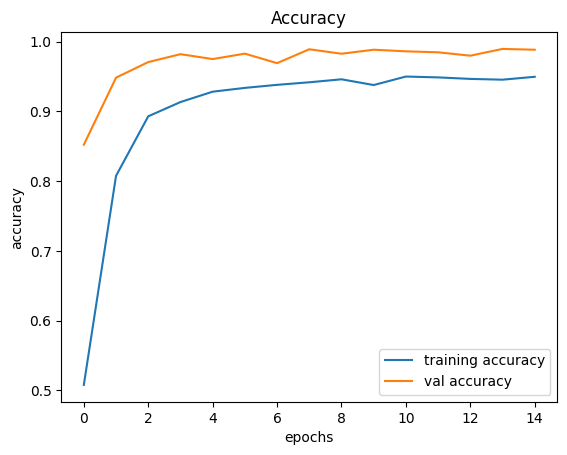

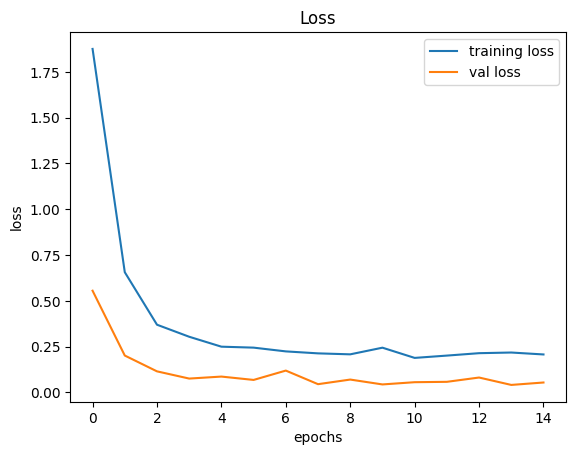

In [26]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [32]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

predictions = model.predict(X_test)
pred = np.argmax(predictions, axis=1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))


395/395 [==============================] - 2s 5ms/step
0.9537608867775138
